In [2]:
%cd /content/drive/MyDrive/cakd7/강의/m9_딥러닝기본

/content/drive/MyDrive/cakd7/강의/m9_딥러닝기본


In [3]:
!pwd

/content/drive/MyDrive/cakd7/강의/m9_딥러닝기본


## 이진 분류

In [4]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 3s 0us/step


In [5]:
imdb

<module 'keras.datasets.imdb' from '/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py'>

In [8]:
import numpy as np
def vectorize_sequences(sequences, dimention=10000):
  results = np.zeros((len(sequences), dimention))
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1. 
  return results

x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [14]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train=y_train[10000:]

In [16]:
partial_x_train.shape

(15000, 10000)

In [17]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 5s 30ms/step - loss: 0.5163 - accuracy: 0.7881 - val_loss: 0.3887 - val_accuracy: 0.8746
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3064 - accuracy: 0.9011 - val_loss: 0.3396 - val_accuracy: 0.8629
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2226 - accuracy: 0.9273 - val_loss: 0.3019 - val_accuracy: 0.8787
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1765 - accuracy: 0.9444 - val_loss: 0.2791 - val_accuracy: 0.8894
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1437 - accuracy: 0.9558 - val_loss: 0.3147 - val_accuracy: 0.8753
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1184 - accuracy: 0.9637 - val_loss: 0.2938 - val_accuracy: 0.8879
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1020 - accuracy: 0.9691 - val_loss: 0.3141 - val_accuracy: 0.8812
Epoch 8/20
30

In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

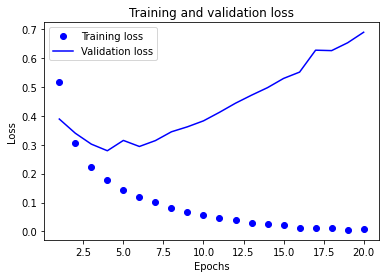

In [19]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


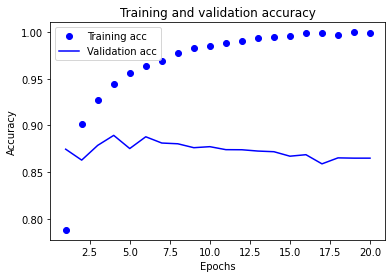

In [20]:
plt.clf()   # 그래프를 초기화합니다
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


### 과제_1102_1. 은닉 층, 층의 유닛 수, 활성화 함수 변경등을 적용하여 모델을 구성하고 기존 모델과 비교 평가하세요.

## 다중 분류

In [21]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data,test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 2s 1us/step


In [22]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [23]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [24]:
from tensorflow.keras import models 
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [25]:
model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [26]:
x_val = x_train[:1000] 
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000] 
partial_y_train = one_hot_train_labels[1000:] 

In [27]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 1s 22ms/step - loss: 2.4916 - accuracy: 0.5438 - val_loss: 1.6684 - val_accuracy: 0.6470
Epoch 2/20
16/16 [==============================] - 0s 10ms/step - loss: 1.3632 - accuracy: 0.7067 - val_loss: 1.3187 - val_accuracy: 0.7130
Epoch 3/20
16/16 [==============================] - 0s 10ms/step - loss: 1.0334 - accuracy: 0.7722 - val_loss: 1.1392 - val_accuracy: 0.7520
Epoch 4/20
16/16 [==============================] - 0s 11ms/step - loss: 0.8191 - accuracy: 0.8222 - val_loss: 1.0418 - val_accuracy: 0.7810
Epoch 5/20
16/16 [==============================] - 0s 10ms/step - loss: 0.6538 - accuracy: 0.8603 - val_loss: 0.9866 - val_accuracy: 0.7960
Epoch 6/20
16/16 [==============================] - 0s 10ms/step - loss: 0.5213 - accuracy: 0.8925 - val_loss: 0.9503 - val_accuracy: 0.8120
Epoch 7/20
16/16 [==============================] - 0s 10ms/step - loss: 0.4225 - accuracy: 0.9131 - val_loss: 0.9220 - val_accuracy: 0.8120
Epoch 8/20
16

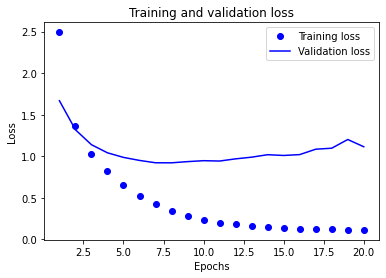

In [28]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

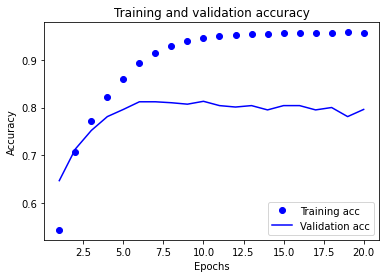

In [29]:
plt.clf() # 그래프 초기화

acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [30]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val,y_val))
results = model.evaluate(x_test,one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 23ms/step - loss: 2.9442 - accuracy: 0.4722 - val_loss: 1.9665 - val_accuracy: 0.6530
Epoch 2/9
16/16 [==============================] - 0s 11ms/step - loss: 1.5262 - accuracy: 0.7121 - val_loss: 1.3473 - val_accuracy: 0.7220
Epoch 3/9
16/16 [==============================] - 0s 11ms/step - loss: 1.0653 - accuracy: 0.7749 - val_loss: 1.1289 - val_accuracy: 0.7680
Epoch 4/9
16/16 [==============================] - 0s 12ms/step - loss: 0.8307 - accuracy: 0.8216 - val_loss: 1.0507 - val_accuracy: 0.7770
Epoch 5/9
16/16 [==============================] - 0s 11ms/step - loss: 0.6670 - accuracy: 0.8623 - val_loss: 0.9738 - val_accuracy: 0.8050
Epoch 6/9
16/16 [==============================] - 0s 11ms/step - loss: 0.5365 - accuracy: 0.8862 - val_loss: 0.9493 - val_accuracy: 0.8030
Epoch 7/9
16/16 [==============================] - 0s 11ms/step - loss: 0.4351 - accuracy: 0.9078 - val_loss: 0.9184 - val_accuracy: 0.8080
Epoch 8/9
16/16 [===

In [31]:
results

[0.9941011667251587, 0.7880676984786987]

In [32]:
predictions = model.predict(x_test)
predictions

71/71 [==============================] - 0s 2ms/step


array([[2.6897239e-06, 4.8252296e-05, 9.6190945e-07, ..., 6.5978638e-06,
        2.5855106e-06, 2.3246828e-06],
       [2.1685823e-03, 2.3215048e-01, 5.8305380e-03, ..., 5.0445385e-03,
        5.8858882e-06, 2.1125528e-05],
       [2.0737634e-03, 7.5895786e-01, 7.7037457e-03, ..., 2.7008916e-03,
        4.0303968e-04, 3.0276398e-04],
       ...,
       [7.5983226e-06, 6.8343375e-05, 1.4457278e-05, ..., 1.0392313e-05,
        7.9830970e-05, 1.1375038e-05],
       [2.3581937e-03, 3.1398963e-02, 2.7646748e-03, ..., 1.8487026e-03,
        6.0680846e-04, 3.5496880e-04],
       [4.7632039e-04, 7.2726226e-01, 2.1292008e-02, ..., 1.0368744e-03,
        6.2766159e-04, 2.0965723e-04]], dtype=float32)

In [34]:
predictions[0].shape

(46,)

In [35]:
np.sum(predictions[0])

0.99999994

In [37]:
print(predictions[0][3])
np.max(predictions[0])

0.9298879


0.9298879

## 충분히 큰 중간층을 두어야 하는 이유
마지막 출력이 46차원이기 때문에 중간층의 히든 유닛이 46개 보다 많이 적어서는 안된다. 46차원 보다 훨씬 작은 중간층을 두면 정보의 병목이 발생될 수 있음

### # 과제_1102_2. 히든 유닛을 4로 설정해서 모델 학습 후 결과를 확인